In [12]:
import cv2
import numpy as np
from skimage import color
import pandas as pd
import matplotlib.pyplot as plt


# Get Video

In [13]:
def get_video(file):
    video = cv2.VideoCapture(file)
    frames = []
    while video.isOpened():
        ret, frame = video.read()
        if not ret:
            break
        frames.append(frame)
    frames = np.asarray(frames)
    return frames

# Convert Video

In [14]:
def convert_color(frames, conversion = "rgb2lab"):
    converted_frames = []
    for frame in frames:
        converted_frame = None
        if conversion == "rgb2ycbcr":
            converted_frame = color.rgb2ycbcr(frame)
        else:
            converted_frame = color.rgb2lab(frame)
        converted_frames.append(converted_frame)
    return np.asarray(converted_frames)


# Find STD

In [15]:
def find_stats(video_file):
    frames = get_video(video_file)
    yuv_frames = convert_color(frames, conversion="rgb2ycbcr")
    
    y_frames = yuv_frames[:,:,:,0]
    y_frames_pd = pd.DataFrame(np.transpose(np.reshape(y_frames,(y_frames.shape[0],y_frames.shape[1]*y_frames.shape[2]))))

    u_frames = yuv_frames[:,:,:,1]
    u_frames_pd = pd.DataFrame(np.transpose(np.reshape(u_frames,(u_frames.shape[0],u_frames.shape[1]*u_frames.shape[2]))))

    v_frames = yuv_frames[:,:,:,2]
    v_frames_pd = pd.DataFrame(np.transpose(np.reshape(v_frames,(v_frames.shape[0],v_frames.shape[1]*v_frames.shape[2]))))
    
    y_frames_pd['std'] = y_frames_pd.transpose().std()
    u_frames_pd['std'] = u_frames_pd.transpose().std()
    v_frames_pd['std'] = v_frames_pd.transpose().std()
    y_frames_pd['mean'] = y_frames_pd.transpose().mean()
    u_frames_pd['mean'] = u_frames_pd.transpose().mean()
    v_frames_pd['mean'] = v_frames_pd.transpose().mean()
    
    return [y_frames_pd['std'].values,u_frames_pd['std'].values, v_frames_pd['std'].values]
    

# Mean Squared Error

In [16]:
from sklearn.metrics import mean_squared_error

def evaluate_mse(ground_truth_std, prediction_std):
    answers = []
    assert len(ground_truth_std) == len(prediction_std)
    for i in range(len(ground_truth_std)):
        answers.append(mean_squared_error(ground_truth_std[i],prediction_std[i]))
    return answers

# Pearson Correlation

In [17]:
from scipy.stats import pearsonr
def evaluate_pearson_corr(ground_truth_std, prediction_std):
    answers = []
    assert len(ground_truth_std) == len(prediction_std)
    for i in range(len(ground_truth_std)):
        answers.append(pearsonr(ground_truth_std[i],prediction_std[i])[0])
    return answers

# Execution

In [18]:
ground_truth_stds = find_stats('/home/chamath/Projects/FlowChroma_Benchmark/data/actionclipautoautotrain00001.avi')
prediction_stds = find_stats('/home/chamath/Projects/FlowChroma_Benchmark/data/actionclipautoautotrain00001.avi')

In [19]:
# evaluate_mse(ground_truth_stds, prediction_stds)
type(ground_truth_stds[0])

numpy.ndarray

# Visualization

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

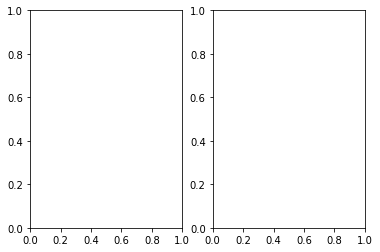

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2)
ground_truth_stds[0][528:3*528].plot.line(ax=ax1,figsize=(18, 6))
ground_truth_stds[1].loc[528:3*528].plot.line(ax=ax2,figsize=(18, 6))
# u_frames_pd['mean'].loc[528:3*528].plot.line(ax=ax2,figsize=(18, 6))
# y_frames_pd['mean'].hist(ax=ax2,figsize=(18, 6))